# **Personality Prediction**

## Data Importation

Import libraries:

In [130]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Import and read the dataset:

In [131]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [132]:
df = pd.read_csv('/content/gdrive/My Drive/Personality prediction/Bronze/mbti_1.csv')
print(df)

      type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]


## Exploratory Data Analysis

### Validation and Data Preparation

Visualize the dataset:

In [133]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


Verify if there are any NaN values:


In [134]:
df.isnull().any()

type     False
posts    False
dtype: bool

Take a look at the data types:

In [135]:
df.dtypes

type     object
posts    object
dtype: object

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


Analyse the dataset:

In [137]:
df.describe(include=['object'])

,type,posts
count,8675,8675
unique,16,8675
top,INFP,Doodles is all I can do :laughing: This is Elv...
freq,1832,1


In [138]:
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

Split the posts:

In [139]:
def extract(posts, new_posts):
    for post in posts[1].split("|||"):
        new_posts.append((posts[0], post))

posts = []
df.apply(lambda x: extract(x, posts), axis=1)
print("Number of users", len(df))
print("Number of posts", len(posts))

Number of users 8675
Number of posts 422845


In [140]:
df = pd.DataFrame(posts, columns=["types", "posts"])
print(df.shape)
print(df.head())

(422845, 2)
  types                                              posts
0  INFJ        'http://www.youtube.com/watch?v=qsXHcwe3krw
1  INFJ  http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2  INFJ  enfp and intj moments  https://www.youtube.com...
3  INFJ  What has been the most life-changing experienc...
4  INFJ  http://www.youtube.com/watch?v=vXZeYwwRDw8   h...


In [141]:
df.describe(include=['object'])

,types,posts
count,422845,422845
unique,16,417311
top,INFP,
freq,89796,1088


### Multivariate Analysis

Analyse the number of personality types and count their number of total posts:

In [142]:
total = df.groupby(['types']).count()
total

,posts
types,
ENFJ,9288
ENFP,32769
ENTJ,11273
ENTP,33761
ESFJ,2018
ESFP,2215
ESTJ,1921
ESTP,4337
INFJ,72105


The graphics of total posts for each personality type:

Text(0.5, 1.0, 'Total posts for each personality type')

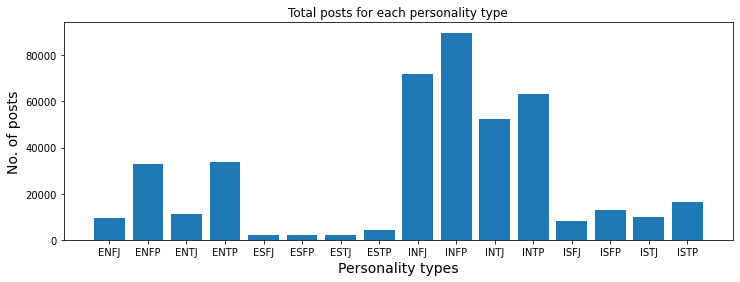

In [143]:
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts', size = 14)
plt.title('Total posts for each personality type')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


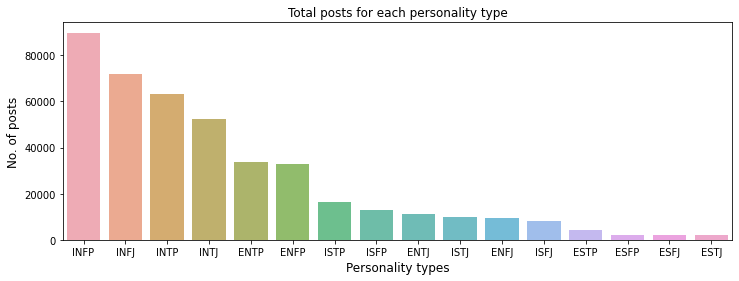

In [144]:
cnt_srs = df['types'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts', fontsize=12)
plt.title('Total posts for each personality type')
plt.show()

### Univariate Analysis

Split every type of personality into pairs of letters, based on their index :

In [145]:
df['Letter1'] = df.apply(lambda row: row.types[0], axis = 1)
df['Letter2'] = df.apply(lambda row: row.types[1], axis = 1)
df['Letter3'] = df.apply(lambda row: row.types[2], axis = 1)
df['Letter4'] = df.apply(lambda row: row.types[3], axis = 1)
df = df.drop(df.columns[0], axis=1)
print(df.head())

                                               posts Letter1  ... Letter3 Letter4
0        'http://www.youtube.com/watch?v=qsXHcwe3krw       I  ...       F       J
1  http://41.media.tumblr.com/tumblr_lfouy03PMA1q...       I  ...       F       J
2  enfp and intj moments  https://www.youtube.com...       I  ...       F       J
3  What has been the most life-changing experienc...       I  ...       F       J
4  http://www.youtube.com/watch?v=vXZeYwwRDw8   h...       I  ...       F       J

[5 rows x 5 columns]


We have obtained a dataframe made of 422845 rows and 5 columns.

Drop duplicates:

In [146]:
df = df.drop_duplicates()

In [147]:
df.shape

(419055, 5)

Eliminate NaN values:

In [148]:
df = df.dropna()

In [149]:
df.shape

(419055, 5)

Our final dataset consists of 419055 rows and 5 columns.

Analyse number of posts per each pair of letters:

In [150]:
letter1 = df[['posts','Letter1']].groupby(['Letter1']).count()
letter1

,posts
Letter1,
E,96550
I,322505


Text(0.5, 1.0, 'Total posts per each letter')

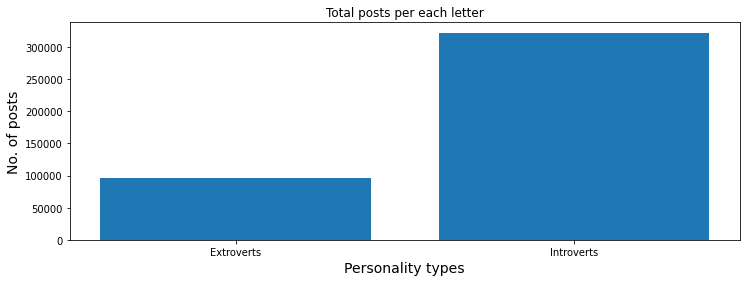

In [151]:
plt.figure(figsize = (12,4))
plt.bar(('Extroverts', 'Introverts'), height = letter1['posts'])
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts', size = 14)
plt.title('Total posts per each letter')

In [152]:
letter2 = df[['posts','Letter2']].groupby(['Letter2']).count()
letter2

,posts
Letter2,
N,361537
S,57518


Text(0.5, 1.0, 'Total posts per each letter')

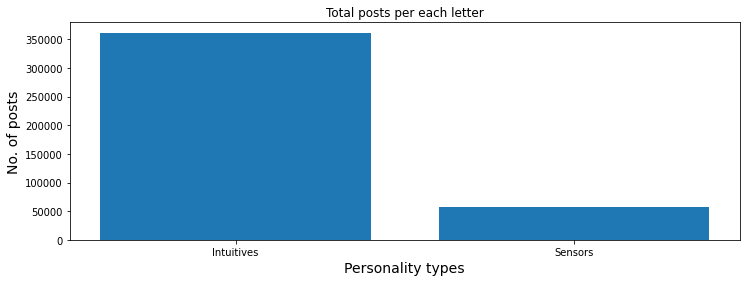

In [153]:
plt.figure(figsize = (12,4))
plt.bar(('Intuitives', 'Sensors'), height = letter2['posts'])
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts', size = 14)
plt.title('Total posts per each letter')

In [154]:
letter3 = df[['posts','Letter3']].groupby(['Letter3']).count()
letter3

,posts
Letter3,
F,227253
T,191802


Text(0.5, 1.0, 'Total posts per each letter')

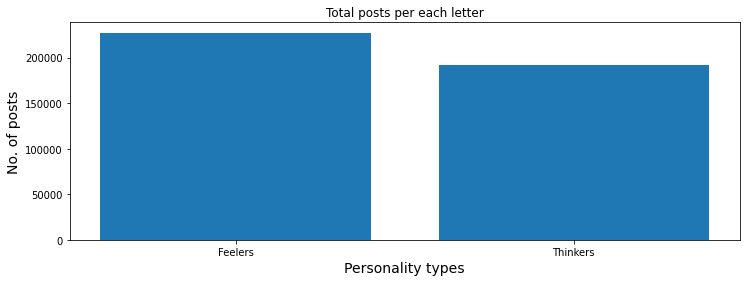

In [155]:
plt.figure(figsize = (12,4))
plt.bar(('Feelers', 'Thinkers'), height = letter3['posts'])
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts', size = 14)
plt.title('Total posts per each letter')

In [156]:
letter4 = df[['posts','Letter4']].groupby(['Letter4']).count()
letter4

,posts
Letter4,
J,165684
P,253371


Text(0.5, 1.0, 'Total posts per each letter')

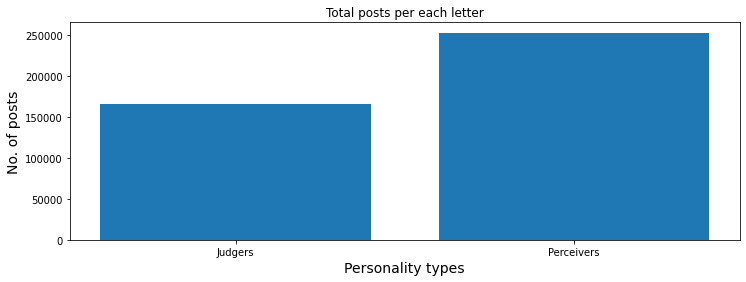

In [157]:
plt.figure(figsize = (12,4))
plt.bar(('Judgers', 'Perceivers'), height = letter4['posts'])
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts', size = 14)
plt.title('Total posts per each letter')

### Analysis of the most frequent words

Delete all the links. 

In [160]:
import re
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
regex = '(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'
df['posts'] = df['posts'].replace(to_replace = regex, value = np.NaN, regex=True)
df = df.dropna()

Analyze the Frequency Distribution:

In [163]:
import nltk
import pandas as pd
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
def counter(text, column_text, quantity, title):
    frequency = nltk.FreqDist(' '.join(list(text[column_text].apply(lambda x: ' '.join(x.split())))).split())  
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.show()

In [164]:
from wordcloud import WordCloud
def counter2(text, column_text, quantity, title):
  all_words = ' '.join(' '.join(list(text[column_text].apply(lambda x: ' '.join(x.split())))).split())
  wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,
    collocations = False).generate(all_words)
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(title)
  plt.show()

The graphics of frequency:

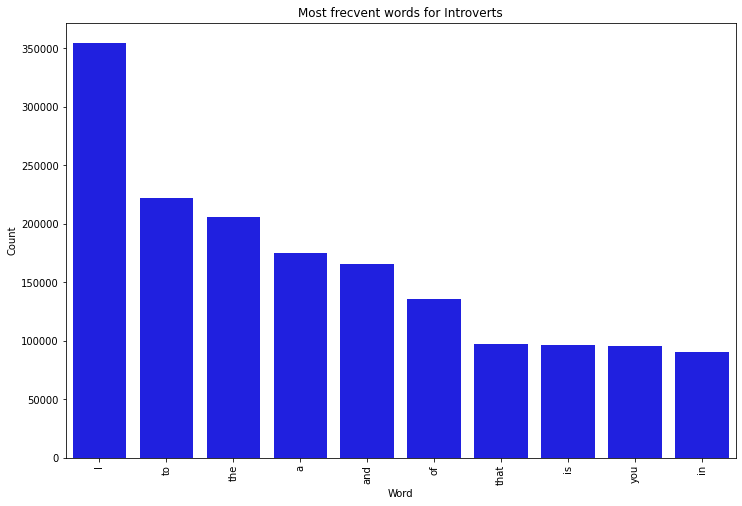

In [165]:
counter(df[df['Letter1'].str.contains("I")], 'posts', 10, 'Most frecvent words for Introverts')

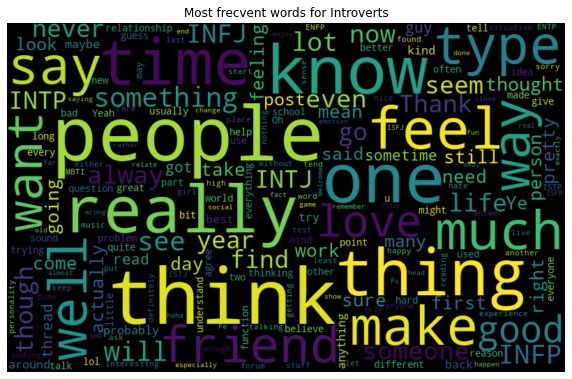

In [166]:
counter2(df[df['Letter1'].str.contains("I")], 'posts', 10, 'Most frecvent words for Introverts')

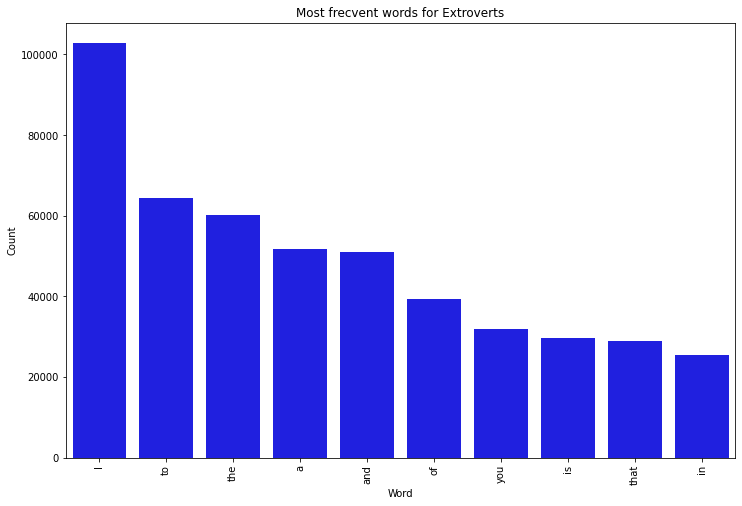

In [167]:
counter(df[df['Letter1'].str.contains("E")], 'posts', 10, 'Most frecvent words for Extroverts')

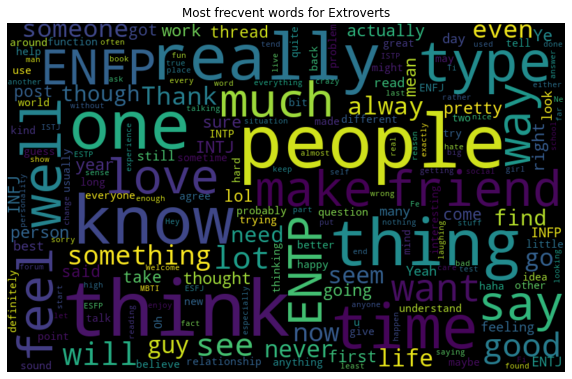

In [168]:
counter2(df[df['Letter1'].str.contains("E")], 'posts', 10, 'Most frecvent words for Extroverts')

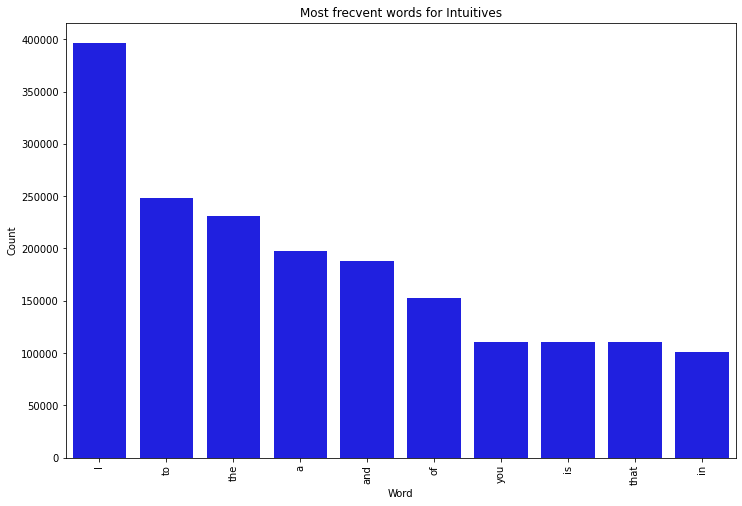

In [169]:
counter(df[df['Letter2'].str.contains("N")], 'posts', 10, 'Most frecvent words for Intuitives')

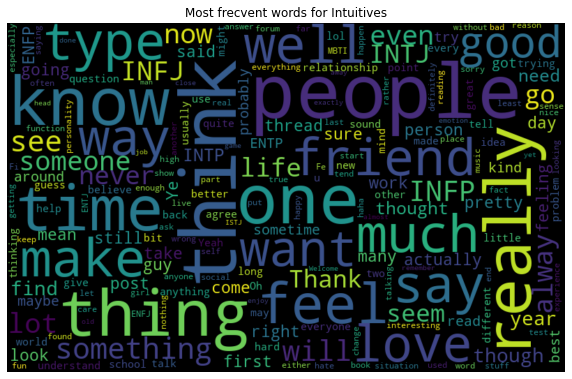

In [170]:
counter2(df[df['Letter2'].str.contains("N")], 'posts', 10, 'Most frecvent words for Intuitives')

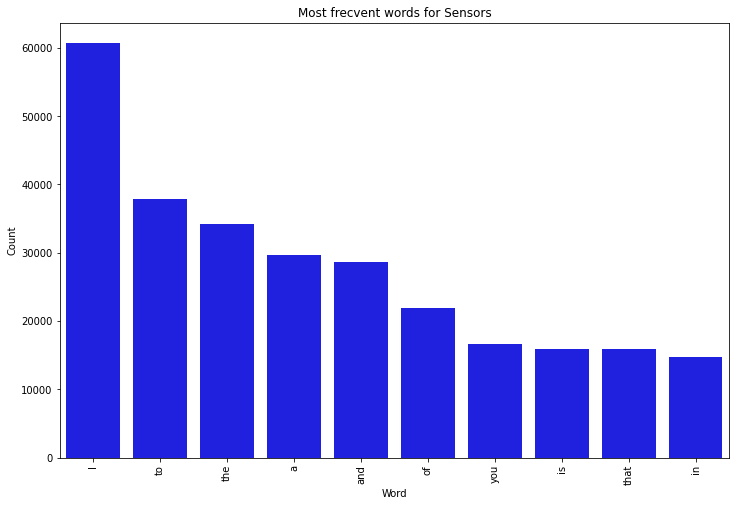

In [171]:
counter(df[df['Letter2'].str.contains("S")], 'posts', 10, 'Most frecvent words for Sensors')

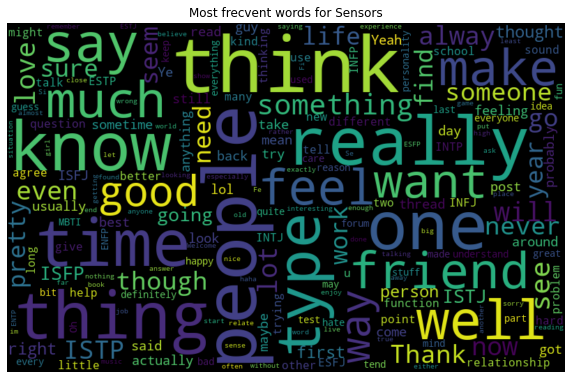

In [172]:
counter2(df[df['Letter2'].str.contains("S")], 'posts', 10, 'Most frecvent words for Sensors')

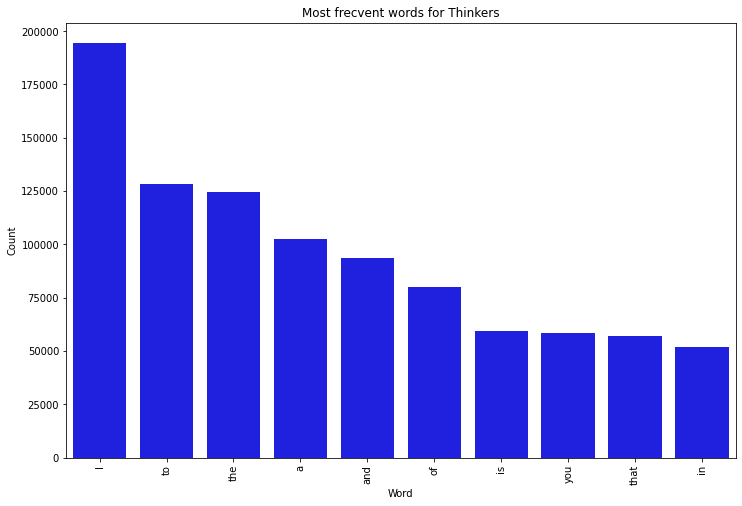

In [173]:
counter(df[df['Letter3'].str.contains("T")], 'posts', 10, 'Most frecvent words for Thinkers')

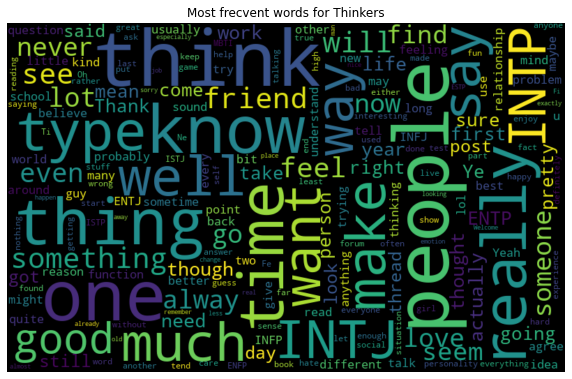

In [174]:
counter2(df[df['Letter3'].str.contains("T")], 'posts', 10, 'Most frecvent words for Thinkers')

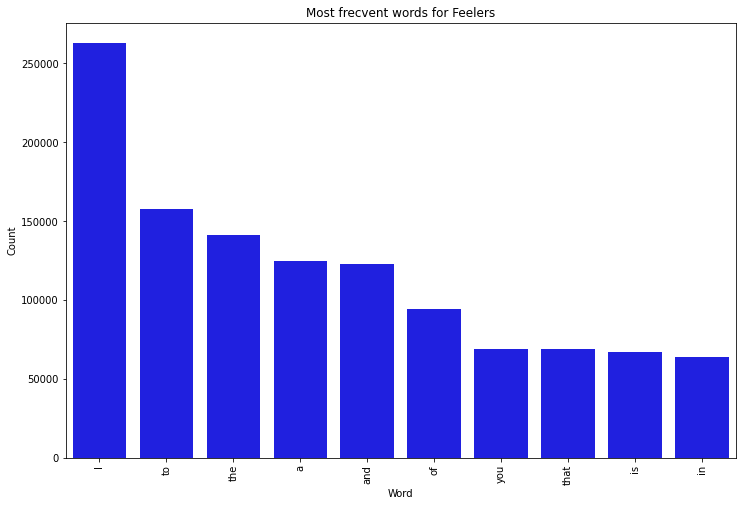

In [175]:
counter(df[df['Letter3'].str.contains("F")], 'posts', 10, 'Most frecvent words for Feelers')

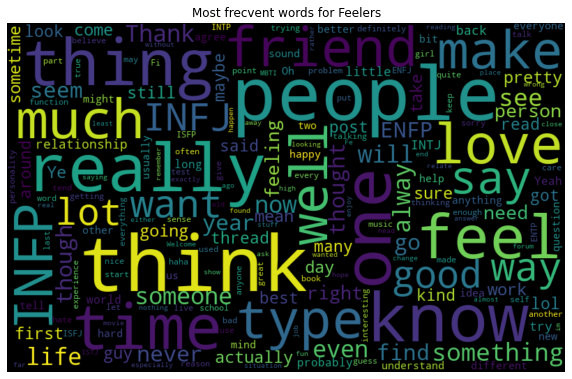

In [176]:
counter2(df[df['Letter3'].str.contains("F")], 'posts', 10, 'Most frecvent words for Feelers')

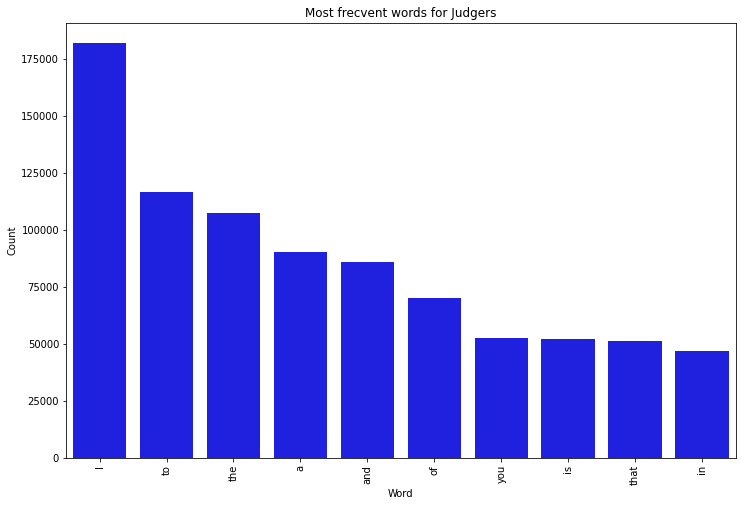

In [177]:
counter(df[df['Letter4'].str.contains("J")], 'posts', 10, 'Most frecvent words for Judgers')

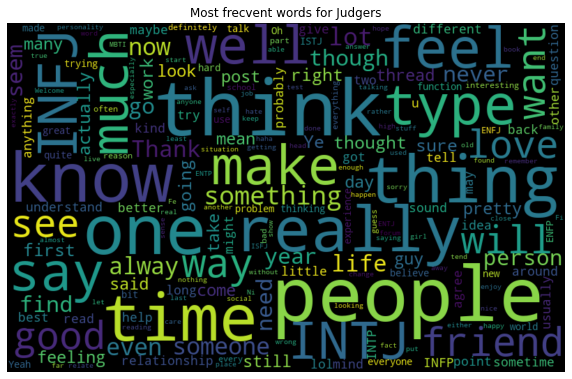

In [178]:
counter2(df[df['Letter4'].str.contains("J")], 'posts', 10, 'Most frecvent words for Judgers')

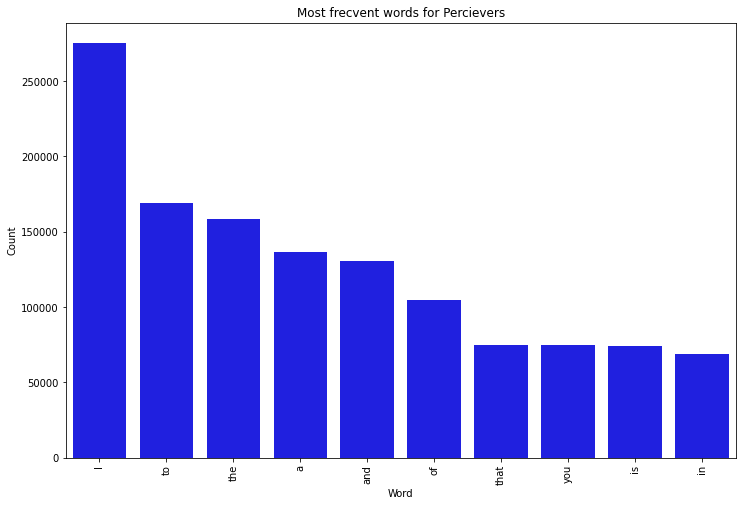

In [179]:
counter(df[df['Letter4'].str.contains("P")], 'posts', 10, 'Most frecvent words for Percievers')

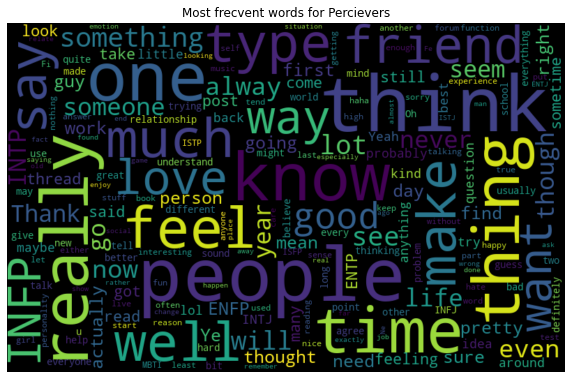

In [180]:
counter2(df[df['Letter4'].str.contains("P")], 'posts', 10, 'Most frecvent words for Percievers')

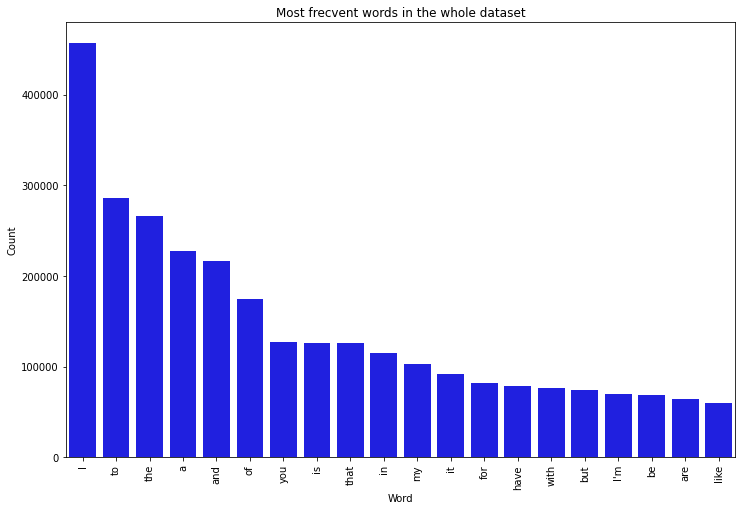

In [181]:
counter(df, 'posts', 20, 'Most frecvent words in the whole dataset')

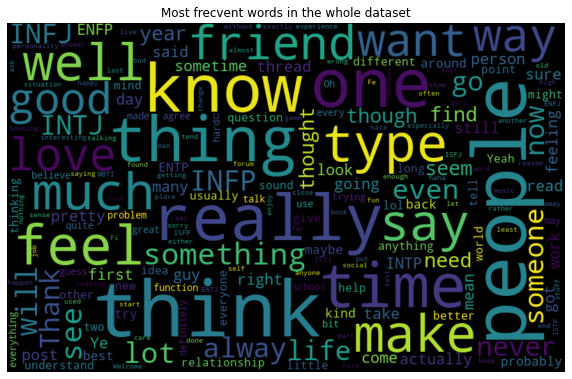

In [182]:
counter2(df, 'posts', 20, 'Most frecvent words in the whole dataset')

## Posts Preprocessing

Tokenize the posts, turn them into lowercase, eliminate punctuation and stopwords, apply stemming.

In [159]:
import nltk
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem import PorterStemmer
porter = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [183]:
posts = df['posts'].values
for i in range(len(posts)):
  posts[i] = ' '.join([porter.stem(word.lower()) for word in tokenizer.tokenize(posts[i]) if word.lower() not in stop])
df['posts'] = posts

## Modeling

Import the necessary libraries:

In [185]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from joblib import dump, load

### Model for the 1st pair

Our dataset is unbalanced, so we're going to undersample the majority class.

In [186]:
class_count_I, class_count_E = df['Letter1'].value_counts()
class_I = df[df['Letter1'] == 'I']
class_E = df[df['Letter1'] == 'E']
print('I:', class_I.shape)
print('E:', class_E.shape)

I: (301904, 5)
E: (92075, 5)


total class of E and I: I    92075
E    92075
Name: Letter1, dtype: int64


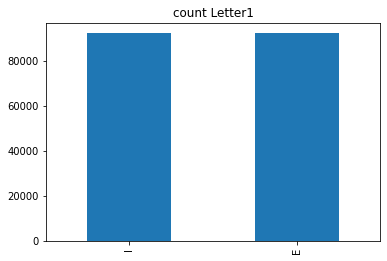

In [187]:
class_I_under = class_I.sample(class_count_E)
test_under1 = pd.concat([class_I_under, class_E], axis=0)
print("total class of E and I:", test_under1['Letter1'].value_counts())
test_under1['Letter1'].value_counts().plot(kind='bar', title='count Letter1')

Create the necessary dataframe and shuffle it:

In [188]:
df1 = test_under1[['posts', 'Letter1']]
df1 = df1.sample(frac = 1)
df1

,posts,Letter1
414221,probabl want hear think tri move hurt like hel...,I
199364,simpl loss even threat lose signific child not...,I
80072,everybodi,E
7498,understand intersex person male femal extern s...,I
415440,pleas forgiv ignor familiar jargon cottonwool ...,I
...,...,...
182971,businessman remov well,E
270737,well intj seem expans knowledg express interes...,I
345604,ring finger much shorter middl thought closer ...,E
147883,worri speak passion deliber point malic behind...,E


Split the dataset into the train and test:

In [189]:
X1 = df1['posts']
y1 = df1['Letter1']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)

Create the model:

In [190]:
pipe1 = Pipeline([('vect', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy", n_jobs = 4, random_state = 2))])
model1 = pipe1.fit(X_train1, y_train1)
prediction1 = model1.predict(X_test1)

Evaluate the model:

accuracy: 56.78%
              precision    recall  f1-score   support

           E       0.57      0.56      0.56     30286
           I       0.57      0.57      0.57     30484

    accuracy                           0.57     60770
   macro avg       0.57      0.57      0.57     60770
weighted avg       0.57      0.57      0.57     60770



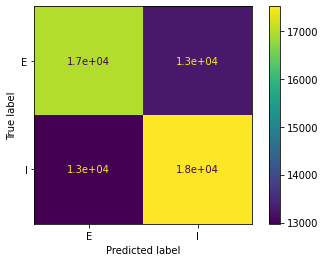

In [191]:
print("accuracy: {}%".format(round(accuracy_score(y_test1, prediction1)*100,2)))
print(metrics.classification_report(y_test1, prediction1))
plot_confusion_matrix(model1, X_test1, y_test1)  
plt.show()

Conclusion:

We have obtained a model that has a 56,78% accuracy score.

Save the model:

In [212]:
dump(model1, '/content/gdrive/MyDrive/Personality prediction/Final Balanced Models/model1.joblib')

['/content/gdrive/MyDrive/Personality prediction/Final Balanced Models/model1.joblib']

### Model for the 2nd pair


Our dataset is unbalanced, so we're going to undersample the majority class.

In [192]:
class_count_N, class_count_S = df['Letter2'].value_counts()
class_N = df[df['Letter2'] == 'N']
class_S = df[df['Letter2'] == 'S']
print('N:', class_N.shape)
print('S:', class_S.shape)

N: (340239, 5)
S: (53740, 5)


total class of S and N: N    53740
S    53740
Name: Letter2, dtype: int64


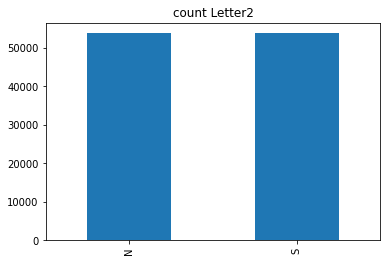

In [193]:
class_N_under = class_N.sample(class_count_S)
test_under2 = pd.concat([class_N_under, class_S], axis=0)
print("total class of S and N:", test_under2['Letter2'].value_counts())
test_under2['Letter2'].value_counts().plot(kind='bar', title='count Letter2')

Create the necessary dataframe and shuffle it:

In [194]:
df2 = test_under2[['posts', 'Letter2']]
df2 = df2.sample(frac = 1)
df2

,posts,Letter2
85879,packag handler fedex ground fit bill pretti we...,S
360979,,N
142621,week super fun easi play occasion awkward fing...,S
237698,least one peopl sexomnia like sleep walk sleep...,N
200786,want infj someon show plz thankx,N
...,...,...
364806,think make complet sens mean initi must judg p...,N
257157,friend let loos sometim act crazi alway reserv...,S
240537,f thing idea fp less like put detail togeth ma...,S
381156,realli bother emphasis peopl share interest ho...,N


Split the dataset into the train and test:

In [195]:
X2 = df2['posts']
y2 = df2['Letter2']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

Create the model:

In [196]:
pipe2 = Pipeline([('vect', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=150, criterion="entropy", n_jobs = 4, random_state = 2))])
model2 = pipe2.fit(X_train2, y_train2)
prediction2 = model2.predict(X_test2)

Evaluate the model:

accuracy: 58.48%
              precision    recall  f1-score   support

           N       0.58      0.61      0.59     17639
           S       0.59      0.56      0.57     17830

    accuracy                           0.58     35469
   macro avg       0.59      0.58      0.58     35469
weighted avg       0.59      0.58      0.58     35469



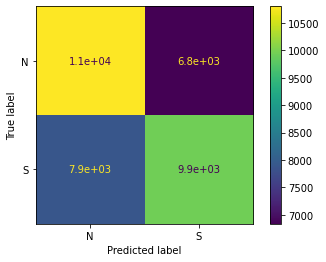

In [197]:
print("accuracy: {}%".format(round(accuracy_score(y_test2, prediction2)*100,2)))
print(metrics.classification_report(y_test2, prediction2))
plot_confusion_matrix(model2, X_test2, y_test2)  
plt.show()

Conclusion:

We have obtained a model that has a 58,48% accuracy score.

Save the model:

In [213]:
dump(model2, '/content/gdrive/MyDrive/Personality prediction/Final Balanced Models/model2.joblib')

['/content/gdrive/MyDrive/Personality prediction/Final Balanced Models/model2.joblib']

### Model for the 3rd pair

Our dataset is unbalanced, so we're going to undersample the majority class.

In [198]:
class_count_F, class_count_T = df['Letter3'].value_counts()
class_F = df[df['Letter3'] == 'F']
class_T = df[df['Letter3'] == 'T']
print('F:', class_F.shape)
print('T:', class_T.shape)

F: (213290, 5)
T: (180689, 5)


total class of T and F: F    180689
T    180689
Name: Letter3, dtype: int64


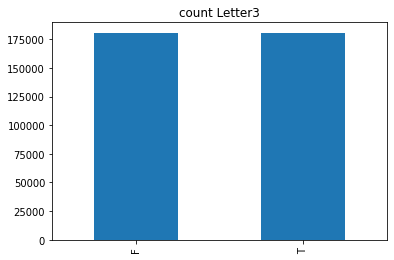

In [199]:
class_F_under = class_F.sample(class_count_T)
test_under3 = pd.concat([class_F_under, class_T], axis=0)
print("total class of T and F:", test_under3['Letter3'].value_counts())
test_under3['Letter3'].value_counts().plot(kind='bar', title='count Letter3')

Create the necessary dataframe and shuffle it:

In [200]:
df3 = test_under3[['posts', 'Letter3']]
df3 = df3.sample(frac = 1)
df3

,posts,Letter3
45358,hahaha true could see domin fe though howev la...,F
146636,get doctor degre shit still much dumbfuck soun...,T
413618,im deadpan kind person find restrain joke arou...,T
141173,dammm spell angri,F
326295,somehow end work feder prison ef hate loud ass...,F
...,...,...
225805,tell final get laugh,F
366518,1 enjoy eat 2 look good red 3 ginger 4 cat sle...,T
13925,true detect thread,T
387218,voic chat welcom back,F


Split the dataset into the train and test:

In [201]:
X3 = df3['posts']
y3 = df3['Letter3']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, random_state=42)

Create the model:

In [203]:
pipe3 = Pipeline([('vect', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy", n_jobs = 4, random_state = 2))])
model3 = pipe3.fit(X_train3, y_train3)
prediction3 = model3.predict(X_test3)

Evaluate the model:

accuracy: 60.5%
              precision    recall  f1-score   support

           F       0.60      0.63      0.61     59737
           T       0.61      0.58      0.59     59518

    accuracy                           0.60    119255
   macro avg       0.61      0.60      0.60    119255
weighted avg       0.61      0.60      0.60    119255



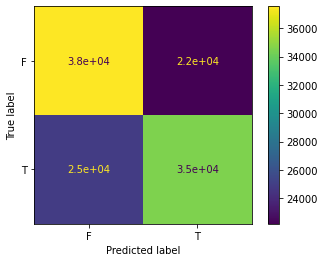

In [204]:
print("accuracy: {}%".format(round(accuracy_score(y_test3, prediction3)*100,2)))
print(metrics.classification_report(y_test3, prediction3))
plot_confusion_matrix(model3, X_test3, y_test3)  
plt.show()

Conclusion:

We have obtained a model that has a 60,5% accuracy score.

Save the model:

In [214]:
dump(model3, '/content/gdrive/MyDrive/Personality prediction/Final Balanced Models/model3.joblib')

['/content/gdrive/MyDrive/Personality prediction/Final Balanced Models/model3.joblib']

### Model for the 4th pair




Our dataset is unbalanced, so we're going to undersample the majority class.

In [205]:
class_count_P, class_count_J = df['Letter4'].value_counts()
class_P = df[df['Letter4'] == 'P']
class_J = df[df['Letter4'] == 'J']
print('P:', class_P.shape)
print('J:', class_J.shape)

P: (237798, 5)
J: (156181, 5)


total class of J and P: P    156181
J    156181
Name: Letter4, dtype: int64


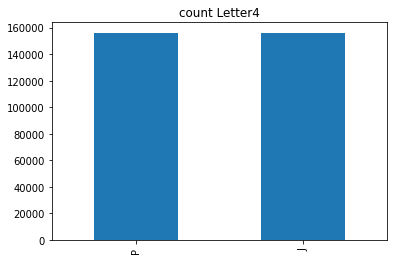

In [206]:
class_P_under = class_P.sample(class_count_J)
test_under4 = pd.concat([class_P_under, class_J], axis=0)
print("total class of J and P:", test_under4['Letter4'].value_counts())
test_under4['Letter4'].value_counts().plot(kind='bar', title='count Letter4')

Create the necessary dataframe and shuffle it:

In [207]:
df4 = test_under4[['posts', 'Letter4']]
df4 = df4.sample(frac = 1)
df4

,posts,Letter4
31895,think topic kind nf type pleas share like thin...,J
151240,measur person intellig import relationship rea...,P
203551,esxj type like health nut,J
321550,o___o happen hair light skin dark smile gap te...,J
409975,need fulfil desir one way listen heart doubt o...,P
...,...,...
407010,english 1st almost fluent spanish year ago for...,P
370775,infp two plastic bag fine trek bag use shop lo...,J
88452,text messag exchang younger brother birthday b...,J
140023,could say scienc one opinion fli spaghetti one...,P


Split the dataset into the train and test:

In [208]:
X4 = df4['posts']
y4 = df4['Letter4']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.33, random_state=42)

Create the model:

In [210]:
pipe4 = Pipeline([('vect', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy", n_jobs = 4, random_state = 2))])
model4 = pipe4.fit(X_train4, y_train4)
prediction4 = model4.predict(X_test4)

Evaluate the model:

accuracy: 55.98%
              precision    recall  f1-score   support

           J       0.56      0.58      0.57     51487
           P       0.56      0.54      0.55     51593

    accuracy                           0.56    103080
   macro avg       0.56      0.56      0.56    103080
weighted avg       0.56      0.56      0.56    103080



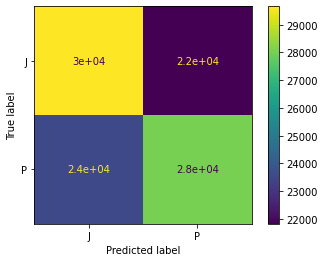

In [211]:
print("accuracy: {}%".format(round(accuracy_score(y_test4, prediction4)*100,2)))
print(metrics.classification_report(y_test4, prediction4))
plot_confusion_matrix(model4, X_test4, y_test4)  
plt.show()

Conclusion:

We have obtained a model that has a 55,98% accuracy score.

Save the model:

In [215]:
dump(model4, '/content/gdrive/MyDrive/Personality prediction/Final Balanced Models/model4.joblib')

['/content/gdrive/MyDrive/Personality prediction/Final Balanced Models/model4.joblib']